In [1]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
# Importing Dependencies
import pandas as pd
import json
import tweepy
import matplotlib.pyplot as plt
import numpy as np 
from  datetime import datetime
import csv
from config import consumer_key, consumer_secret, access_token, access_token_secret
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [3]:
# Twitter Credentials
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [4]:
search_term = "$mb"

In [5]:
# Open/Create a file to append data
csvFile = open('mindbody_cashtags_tweets.csv', 'w')

In [6]:
#Use csv Writer
csvWriter = csv.writer(csvFile)

In [7]:
for tweet in tweepy.Cursor(api.search,q=search_term, lang="en").items(10000):
    print (tweet.created_at, tweet.text)
    csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8')])

2018-06-20 23:59:45 Buying $MB tomorrow
2018-06-20 22:38:52 MINDBODY Inc $MB Expected to Post Quarterly Sales of $60.48 Million https://t.co/h3vANz9kiJ
2018-06-20 22:37:45 MINDBODY Inc $MB Expected to Post Quarterly Sales of $60.48 Million https://t.co/KeCRw1984u
2018-06-20 22:34:27 MINDBODY Inc $MB Expected to Post Earnings of -$0.08 Per Share https://t.co/l042SOtj8X
2018-06-20 22:00:37 20dh in leading stocks scan $CGC, $STAA, $COLL, $ARRY, $MLNX, $WGO, $BOX, $MB, $ONCE, $EGLE, $DEST https://t.co/vv8NDLp7y1
2018-06-20 17:29:27 $MB nice breakout

https://t.co/3K1cpFZ3Tf https://t.co/jxnSBX4TsR
2018-06-20 17:11:58 MINDBODY $MB Stock Rating Upgraded by TheStreet https://t.co/8ZuDe17BtA
2018-06-20 15:30:40 MINDBODY $MB Upgraded at TheStreet https://t.co/ZhKtf8R6Ju
2018-06-20 14:59:11 RT @PreeseInnaBooth: 🙅🏽‍♂️🙅🏽‍♂️🙅🏽‍♂️✋
NEW VIDEO DROPPING THIS WEEK🤭♨️

$MB NEED I.T 
•
Straight Heat 🔥🔥🔥🗣
FUCK THAT ROLLIE &amp; THAT A|P💮 http…
2018-06-20 13:28:54 (Watch In HD) $MB - Need It (Directed by Ki

In [9]:
csvFile.close()

In [16]:
mb_name = 'mindbody_cashtags_tweets.csv'
mb = pd.read_csv(mb_name, header=None)

In [17]:
analyzer = SentimentIntensityAnalyzer()
compound_list = []
positive_list = []
negative_list = []
neutral_list = []


for tweet in mb[1]:
    # Run Vader Analysis on each tweet
    results = analyzer.polarity_scores(tweet)
    compound = results["compound"]
    pos = results["pos"]
    neu = results["neu"]
    neg = results["neg"]
    # Add each value to the appropriate list
    compound_list.append(compound)
    positive_list.append(pos)
    negative_list.append(neg)
    neutral_list.append(neu)
    
mb['compound'] = compound_list
mb['positive'] = positive_list
mb['negative'] = negative_list
mb['neutral'] = neutral_list


In [22]:
# make col name 0 and 1 --> 'Date' and 'Info'
mb.rename(columns={0:'Date', 1:'Info'}, inplace=True)
mb.dtypes

len(compound_list), len(positive_list), len(negative_list), len(neutral_list)
mb.dtypes

Date         object
Info         object
compound    float64
positive    float64
negative    float64
neutral     float64
dtype: object

mb.head(53)

In [23]:
# convert 0 to datetime
mb['Date'] = pd.to_datetime(mb['Date'])

In [24]:
mb['Day']= mb['Date'].dt.day
mb['Hour'] = mb['Date'].dt.hour
mb2 = mb.loc[ mb.Hour.isin(range(9,17)) ]  # keep only hours from 9am .. 4pm (hour == 16)
mb2.head()

,Date,Info,compound,positive,negative,neutral,Day,Hour
7,2018-06-20 15:30:40,b'MINDBODY $MB Upgraded at TheStreet https://t...,0.0,0.0,0.0,1.0,20,15
8,2018-06-20 14:59:11,b'RT @PreeseInnaBooth: \xf0\x9f\x99\x85\xf0\x9...,0.0,0.0,0.0,1.0,20,14
9,2018-06-20 13:28:54,b'(Watch In HD) $MB - Need It (Directed by Kin...,0.0,0.0,0.0,1.0,20,13
10,2018-06-20 13:16:45,b'MINDBODY $MB Stock Rating Upgraded by TheStr...,0.0,0.0,0.0,1.0,20,13
11,2018-06-20 11:26:29,b'MINDBODY $MB Upgraded at TheStreet https://t...,0.0,0.0,0.0,1.0,20,11


In [25]:
pos_mean = mb2.groupby(['Day','Hour'])['positive'].mean()
neg_mean = mb2.groupby(['Day','Hour'])['negative'].mean()
sent = pos_mean - neg_mean
dates = mb2.groupby(['Day','Hour'])['Date'].first()

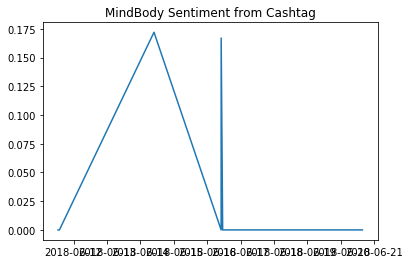

In [27]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.title('MindBody Sentiment from Cashtag')
plt.plot(dates, sent)

In [30]:
mb['Day'].unique()

array([20, 19, 18, 17, 16, 15, 14, 13, 12, 11], dtype=int64)

In [31]:
pos_mean

Day  Hour
11   12      0.000
     13      0.000
14   9       0.172
16   9       0.000
     10      0.167
     11      0.000
     15      0.000
17   13      0.000
19   14      0.000
20   11      0.000
     13      0.000
     14      0.000
     15      0.000
Name: positive, dtype: float64

In [32]:
neg_mean

Day  Hour
11   12      0.0
     13      0.0
14   9       0.0
16   9       0.0
     10      0.0
     11      0.0
     15      0.0
17   13      0.0
19   14      0.0
20   11      0.0
     13      0.0
     14      0.0
     15      0.0
Name: negative, dtype: float64